## Import Libraries

In [71]:
pip install nlp_utils

In [72]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

## Read the data


In [73]:
f = open("dialogs.txt", "r")
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [74]:
df = pd.read_csv("dialogs.txt", names = ('Query', 'Response'), sep = '\t')
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


## Data understanding

In [75]:
df.shape

(3725, 2)

There are 3725 rows and 2 columns in this dataset

In [76]:
df.columns

Index(['Query', 'Response'], dtype='object')

'Query' and 'Response' are the name of the 2 columns

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


.info() method allows us to learn the shape of object types of our data

In [78]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


.describe() method gives us summary statistics for numerical columns in our DataFrame

In [79]:
df.nunique()

,0
Query,3510
Response,3512


.nunique() function returns number of unique elements in the object

In [80]:
df.isnull().sum()

,0
Query,0
Response,0


There are no null values present in the data

In [81]:
# Checking the count of the values present in the 'Query' column
df['Query'].value_counts()

,count
Query,
what do you mean?,22
why not?,16
what happened?,10
why is that?,9
me too.,7
...,...
you can yell at them.,1
and they will yell back at you.,1
yelling doesn't do any good.,1


In [82]:
# Checking the count of the values present in the 'Response' column
df['Response'].value_counts()

,count
Response,
what do you mean?,22
why not?,16
what happened?,10
why is that?,9
of course.,8
...,...
i don't understand some things.,1
let me help you.,1
"what does ""mi"" mean?",1


## Data Visualization

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

The SentimentIntensityAnalyzer class provides a method called polarity_scores() that takes a piece of text as input and returns a dictionary containing the sentiment scores for the text

The dictionary contains four keys: neg , neu , pos , and compound (the sentiment score (between 0 and 1))


In [84]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [85]:
Text = df['Query']

In [86]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
  print(sentence)

  ss = sid.polarity_scores(sentence)
  for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print()

Streaming output truncated to the last 5000 lines.
of course i heard that. i thought a plane had crashed into your house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it wasn't that loud.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i will blow my nose sometime for you, and you'll see.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay. i'll take your word for it.
neg: 0.0, neu: 0.759, pos: 0.241, compound: 0.2263, 
i thought you had an elephant in your house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you're funny.
neg: 0.0, neu: 0.256, pos: 0.744, compound: 0.4404, 
what did you say? i think i've gone deaf.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have lots of friends.
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
really? how many do you have?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't know, maybe one hundred.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that is a lot of friends. do you have a best friend?
neg: 0.0, neu: 0.4, pos: 0.6, compound: 0.8885,

In [87]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df = pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [88]:
from wordcloud import WordCloud

A WordCloud helps us visualize the frequency of words in a dataset by displaying words in various sizes, where the size of each word corresponds to its frequency of occurrence in the text.

In [89]:
# Visualize the wordcloud
def wordcloud(df, label):

  subset = df[df[label]==1]
  text = df.Query.values
  wc = WordCloud(background_color = 'black', max_words=1000)

  wc.generate(' '.join(text))

  plt.figure(figsize=(20,20))
  plt.subplot(221)
  plt.axis('off')
  plt.title("Frequently Occurring Words in {}".format(label), fontsize=20)
  plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

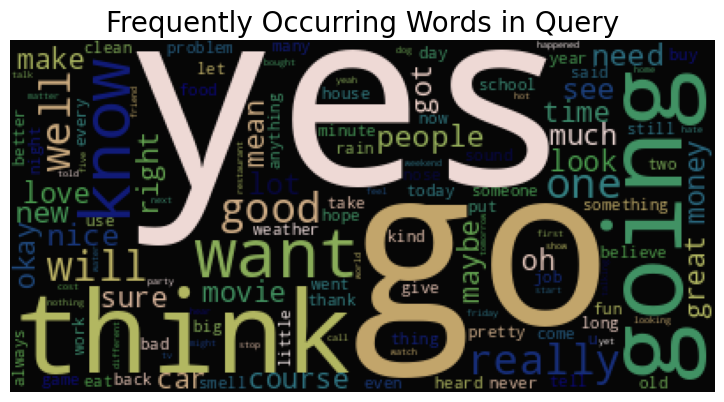

In [90]:
wordcloud(df, 'Query')

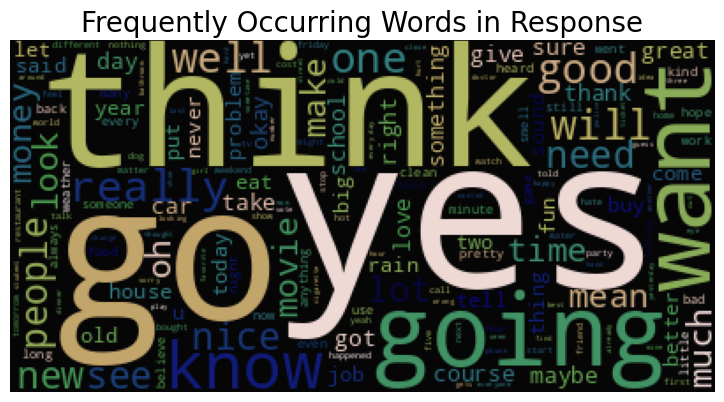

In [91]:
wordcloud(df, 'Response')

## Text Normalization

Text normalization is the process of converting text from its written form into a standardized format, often involving transformations like lowercasing, removing punctuation, and expanding contractions.

In [92]:
import re # regular expressions

In [93]:
# Convert the text to lower case
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [94]:
# Remove \n and replace them with empty value
remove_n = lambda x: re.sub("\n", "", x)

In [95]:
# Remove non ascii characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

In [96]:
# remove alpha numeric values
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [97]:
# apply all the functions to the Query column
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [98]:
# apply all the functions to the Response column
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [99]:
# cleand dataset
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


## Important sentence

In [100]:
# Arranging the compound column in descending order to find the best sentence
imp_sent = df.sort_values(by=['compound'], ascending=False)

In [101]:
imp_sent.head()

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


### Top Positive Sentence

In [102]:
# Arranging the positive column in descending order to find the best positive sentence
pos_sent = df.sort_values(by=['pos'], ascending=False)
pos_sent.head()

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


### Top Negative Sentence

In [103]:
# Arranging the negative column in descending order to find the most negative sentence
neg_sent = df.sort_values(by=['neg'], ascending=False)
neg_sent.head()

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


### Top Neutral Sentence

In [104]:
# Arranging the neutral column in descending order to find the most neutral sentence
neu_sent = df.sort_values(by=['neu'], ascending=False)
neu_sent.head()

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


## Word Embedding

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer is a feature extraction method in Natural Language Processing (NLP) that converts a collection of text documents into a matrix of TF-IDF features

In [106]:
tfidf = TfidfVectorizer()

In [107]:
# Change column into array
factors = tfidf.fit_transform(df['Query']).toarray()

In [108]:
# Display feature names
tfidf.get_feature_names_out()

array(['able', 'about', 'absolutely', ..., 'yy', 'zip', 'zoo'],
      dtype=object)

## Application

In [109]:
from sklearn.metrics.pairwise import cosine_distances

In [117]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Cosine Distance measures the cosine of the angle between two non-zero vectors in an inner product space. It is a measure of similarity rather than distance, often used in text analysis and clustering tasks.

In [113]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatization_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [114]:
query = 'Who are you ?'
def chatbot(query):
  # step:-1 clean
  query = lemmatization_sentence(query)
  # step:-2 word embedding - transform
  query_vector = tfidf.transform([query]).toarray()
  # step:-3 cosine similarity
  similar_score = 1 - cosine_distances(factors, query_vector)
  index = similar_score.argmax() # take max index position
  # searching or matching question
  matching_question = df.loc[index]['Query']
  response = df.loc[index]['Response']
  pos_score = df.loc[index]['pos']
  neg_score = df.loc[index]['neg']
  neu_score = df.loc[index]['neu']
  confidence = similar_score[index]
  chat_dict = {'match': matching_question,
               'response': response,
               'score': confidence,
               'pos': pos_score,
               'neg': neg_score,
               'neu': neu_score,
               }
  return chat_dict

In [124]:
while True:
  query = input('Chat with (lucyneee)BOT.\nType "exit" to close the chat\nUSER: ')
  if query == 'exit':
    print('='*80)
    print('(lucyneee)BOT: See you later!')
    break


  response = chatbot(query)
  if response['score'] <= 0.2:
    print('(lucyneee)BOT: Please rephrase your question.')

  else:
    print('='*80)
    print('log:\n Matched Question: %r\n Confidence Score: %0.2f \n Positive Score: %r \n Negative Score: %r \n Neutral: %r'%(
        response['match'],
        response['score'],
        response['pos'],
        response['neg'],
        response['neu']
    ))
    print('='*80)
    print('(lucyneee)BOT: ',response['response'])
    print('='*80)

Chat with (lucyneee)BOT.
Type "exit" to close the chat
USER: hi how are you
log:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 0.86 
 Positive Score: 0.0 
 Negative Score: 0.0 
 Neutral: 1.0
(lucyneee)BOT:  i m fine  how about yourself 
Chat with (lucyneee)BOT.
Type "exit" to close the chat
USER: i am fine. i think it will rain today
log:
 Matched Question: 'i really want it to rain today '
 Confidence Score: 0.46 
 Positive Score: 0.242 
 Negative Score: 0.0 
 Neutral: 0.758
(lucyneee)BOT:  yeah  so do i 
Chat with (lucyneee)BOT.
Type "exit" to close the chat
USER: i love rain
log:
 Matched Question: 'i love you '
 Confidence Score: 0.59 
 Positive Score: 0.808 
 Negative Score: 0.0 
 Neutral: 0.192
(lucyneee)BOT:  i love you  too 
Chat with (lucyneee)BOT.
Type "exit" to close the chat
USER: bye
(lucyneee)BOT: Please rephrase your question.
Chat with (lucyneee)BOT.
Type "exit" to close the chat
USER: exit
(lucyneee)BOT: See you later!
